In [17]:
from run_functions.train_models import train_models
from Eng_2d_RAE2822.plot_2d_RAE import *
import numpy as np


qoi_data = np.load("RAE2822_2D_qoi.npy")
ma_data = np.load("RAE2822_2D_ma.npy")
aoa_data = np.load("RAE2822_2D_aoa.npy")

index_qoi = 0 # 0: Cl, 1: Cd, 2:Cm

entire_x = np.zeros((ma_data.shape[0] * aoa_data.shape[0], 2))
entire_LF_y = np.zeros((ma_data.shape[0] * aoa_data.shape[0]))
entire_MF_y = np.zeros((ma_data.shape[0] * aoa_data.shape[0]))
entire_HF_y = np.zeros((ma_data.shape[0] * aoa_data.shape[0]))

for ma_idx in range(qoi_data.shape[2]):
    for aoa_idx in range(qoi_data.shape[3]):
        entire_x[qoi_data.shape[3] * ma_idx + aoa_idx, 0] = ma_data[ma_idx]
        entire_x[qoi_data.shape[3] * ma_idx + aoa_idx, 1] = aoa_data[aoa_idx]
        entire_LF_y[qoi_data.shape[3] * ma_idx + aoa_idx] = qoi_data[0, index_qoi, ma_idx, aoa_idx]
        entire_MF_y[qoi_data.shape[3] * ma_idx + aoa_idx] = qoi_data[1, index_qoi, ma_idx, aoa_idx]
        entire_HF_y[qoi_data.shape[3] * ma_idx + aoa_idx] = qoi_data[2, index_qoi, ma_idx, aoa_idx]

np.random.seed(42)
LF_rand_idx = np.random.choice(np.arange(0, ma_data.shape[0] * aoa_data.shape[0]), size=100, replace=False)
MF_rand_idx = np.random.choice(np.arange(0, ma_data.shape[0] * aoa_data.shape[0]), size=50, replace=False)
HF_rand_idx = np.random.choice(np.arange(0, ma_data.shape[0] * aoa_data.shape[0]), size=25, replace=False)

LF_x = entire_x[LF_rand_idx]
MF_x = entire_x[MF_rand_idx]
HF_x = entire_x[HF_rand_idx]

LF_y = entire_LF_y[LF_rand_idx]
MF_y = entire_MF_y[MF_rand_idx]
HF_y = entire_HF_y[HF_rand_idx]


In [5]:
from run_functions.train_models import train_models
from Eng_2d_RAE2822.plot_2d_RAE import *
import numpy as np


qoi_data = np.load("RAE2822_2D_qoi.npy")
ma_data = np.load("RAE2822_2D_ma.npy")
aoa_data = np.load("RAE2822_2D_aoa.npy")

# Normalize Ma, AoA
from sklearn.preprocessing import MinMaxScaler
print(ma_data.shape, aoa_data.shape)
ma_scaler, aoa_scaler = MinMaxScaler(), MinMaxScaler()
ma_data = ma_scaler.fit_transform(ma_data.reshape(-1, 1))
aoa_data = aoa_scaler.fit_transform(aoa_data.reshape(-1, 1))
print(ma_data.reshape(-1), aoa_data.reshape(-1))

(9,) (21,)
[0.         0.16666667 0.33333333 0.5        0.66666667 0.75
 0.83333333 0.91666667 1.        ] [[0.  ]
 [0.05]
 [0.1 ]
 [0.15]
 [0.2 ]
 [0.25]
 [0.3 ]
 [0.35]
 [0.4 ]
 [0.45]
 [0.5 ]
 [0.55]
 [0.6 ]
 [0.65]
 [0.7 ]
 [0.75]
 [0.8 ]
 [0.85]
 [0.9 ]
 [0.95]
 [1.  ]]


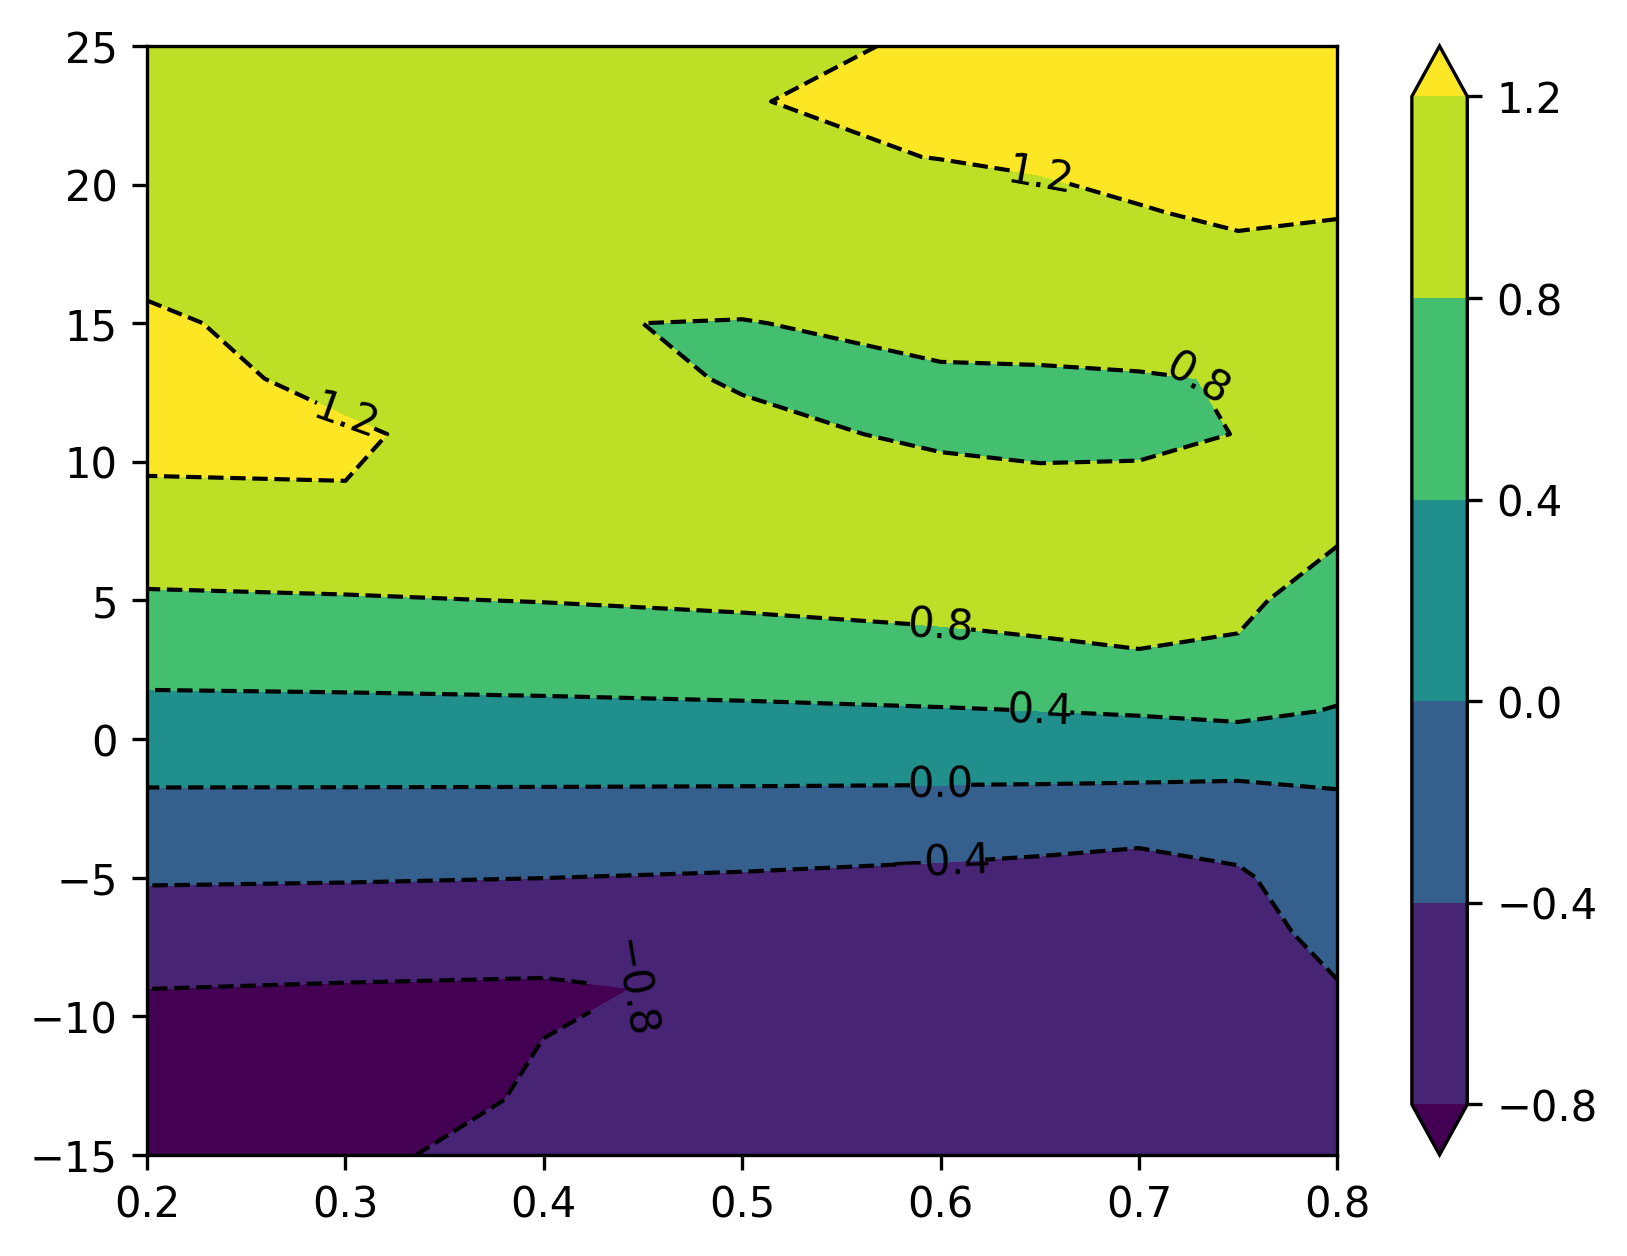

In [18]:
xx, yy = entire_x[:,0].reshape(9,-1), entire_x[:,1].reshape(9,-1)
# xx, yy = np.meshgrid(x1, x2)
test_x = np.hstack((xx.reshape(-1,1), yy.reshape(-1,1)))
# i_pred = i_model.predict(test_x, pred_fidelity=2, return_std=False)
# r_pred = r_model.predict(test_x, pred_fidelity=2, return_std=False)
# i_pred, r_pred = i_pred.reshape(-1, aoa_data.shape[0]), r_pred.reshape(-1, aoa_data.shape[0])
ground_truth = qoi_data[2, index_qoi, :, :]

current_palette = sns.color_palette("viridis", as_cmap=True)

fig, ax = plt.subplots(dpi=300)
contour1 = ax.contour(xx, yy, ground_truth, colors='k', linewidths=1, linestyles='--', extend='both')  ## 등고선
contour2 = ax.contourf(xx, yy, ground_truth, cmap=current_palette, extend='both')
ax.clabel(contour1, contour1.levels, inline=True)  ## contour 라벨 #0-250
fig.colorbar(contour2)
plt.show()

In [ ]:

IHKs, RHKs, i_errors, r_errors, IHK_likeli, RHK_likeli, IHK_time, RHK_time = train_models([LF_x, MF_x, HF_x], [LF_y, MF_y, HF_y],
                                              test_x=entire_x, test_y=entire_HF_y,
                                              history=True, repetition=15, add_noise=[], rand_seed=42)




plot_2d_RAE(IHKs[0], RHKs[0], entire_x, aoa_data, qoi_data, index_qoi)

print("IHK likelihood: ", np.mean(IHK_likeli, axis=0))
print("IHK error: ", np.mean(i_errors, axis=0))
print("IHK time: ", np.sum(IHK_time))
print("********************")
print("RHK likelihood: ", np.mean(RHK_likeli, axis=0))
print("RHK error: ", np.mean(r_errors, axis=0))
print("RHK time: ", np.sum(RHK_time))

np.save(f"IHK_likeli.npy", IHK_likeli)
np.save(f"RHK_likeli.npy", RHK_likeli)
np.save(f"IHK_i_errors.npy", i_errors)
np.save(f"RHK_r_errors.npy", r_errors)
np.save(f"IHK_time.npy", IHK_time)
np.save(f"RHK_time.npy", RHK_time)